# Лабораторная работа №3

In [131]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# Для отображения русского текста на графиках
from matplotlib import rc
font = {'family': "Times New Roman",
        'weight': 'normal'}
rc('font', **font)

# Задаем слудующую кривую
def p_func(t):
    return t**2*np.exp(-t/5)+5*np.sin(t/2)
# Производная dp/dt
def dp_func(t):
    return 2*t*np.exp(-t/5)-1/5*t**2*np.exp(-t/5)+5/2*np.cos(t/2)
# Вnорая производная от p
def ddp_func(t):
    return 2*np.exp(-t/5)-2/5*t*np.exp(-t/5)+1/25*t**2*np.exp(-t/5)-5/4*np.sin(t/2)


In [132]:
# Рассчитываем истинную кривую
t_real = np.linspace(0, 30, 500)
p_real = p_func(t_real)
# Берем N точек кривой чтобы построить ломаную
N = 10
t_points = np.linspace(0, 30, N)
p_points = p_func(t_points)
dp_points = dp_func(t_points)
ddp_points = ddp_func(t_points)

In [133]:
# Сплайн Ньютона

# Поиск коэффициентов
def coef(t, p):
    n = len(t)
    a = np.copy(p)
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = (a[i]-a[i-1])/(t[i]-t[i-j])
    return np.array(a)

def newton_spline(t_arr, t, p):
    p_arr = np.zeros_like(t_arr)
    a = coef(t, p)
    n = len(a)-1
    for i, t_ in enumerate(t_arr):
        if t_ <= t[0] or t_ > t[-1]:
            raise ValueError("t_arr[{}]={} is out of bounds".format(i, t_,))
        result = a[n]
        for k in range(n-1, -1, -1):
            result = result*(t_-t[k])+a[k]
        p_arr[i] = result
    return p_arr

t_newton = np.linspace(0.1, 30, 500)
p_newton = newton_spline(t_newton, t_points, p_points)

In [134]:
# Сплайн Лагранжа

In [135]:
# Кубический сплайн
def cubic_spline(t_arr, t, p, ddp):
    p_arr = np.zeros_like(t_arr)
    for i, t_ in enumerate(t_arr):
        if t_ <= t[0] or t_ > t[-1]:
            raise ValueError("t_arr[{}]={} is out of bounds".format(i, t_,))
        # Находим интервал в который попадает t
        # k: t[k-1] < t_<= t[k]
        k = bisect_left(t, t_)
        w = (t_-t[k-1])/(t[k]-t[k-1])
        p_arr[i] = (1-w)*p[k-1]+w*p[k]+((-2*w+3*w**2-w**3)*ddp[k-1]+(-w+w**3)*ddp[k])*(t[k]-t[k-1])/6
    return p_arr   
t_cubic = np.linspace(0.1, 30, 500)
p_cubic = cubic_spline(t_cubic, t_points, p_points, ddp_points)

In [136]:
# Сплайн Эрмита
from bisect import bisect_left

def hermit_spline(t_arr, t, p, dp):
    p_arr = np.zeros_like(t_arr)
    for i, t_ in enumerate(t_arr):
        if t_ <= t[0] or t_ > t[-1]:
            raise ValueError("t_arr[{}]={} is out of bounds".format(i, t_,))
        # Находим интервал в который попадает t
        # k: t[k-1] < t_<= t[k]
        k = bisect_left(t, t_)
        w = (t_-t[k-1])/(t[k]-t[k-1])
        a0 = 1-3*w**2+2*w**3
        a1 = 3*w**2-2*w**3
        b0 = w-2*w**2+w**3
        b1 = -w**2+w**3
        p_arr[i] = a0*p[k-1]+a1*p[k]+b0*dp[k-1]+b1*dp[k]
    return p_arr   
t_hermit = np.linspace(0.1, 30, 500)
p_hermit = hermit_spline(t_hermit, t_points, p_points, dp_points)

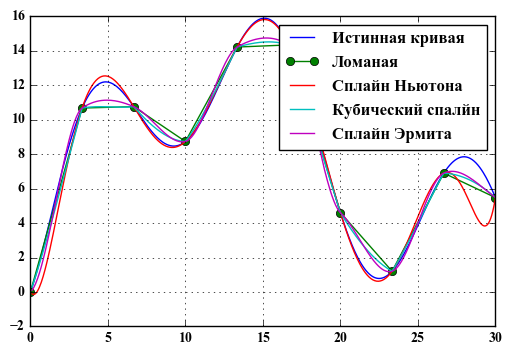

In [137]:
# Строим график
plt.plot(t_real, p_real, label='Истинная кривая')
plt.plot(t_points, p_points, label='Ломаная', marker='o')
plt.plot(t_newton, p_newton, label='Сплайн Ньютона')
plt.plot(t_cubic, p_cubic, label='Кубический спалйн')
plt.plot(t_hermit, p_hermit, label='Сплайн Эрмита')

plt.legend()
plt.grid()
plt.show()